## Deep Learning for Image Classification Assessment

**Our task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.**

    Label	  Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot


**We are importing fashion_mnist data from keras**

### Data

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 50s 11us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visualize the Data

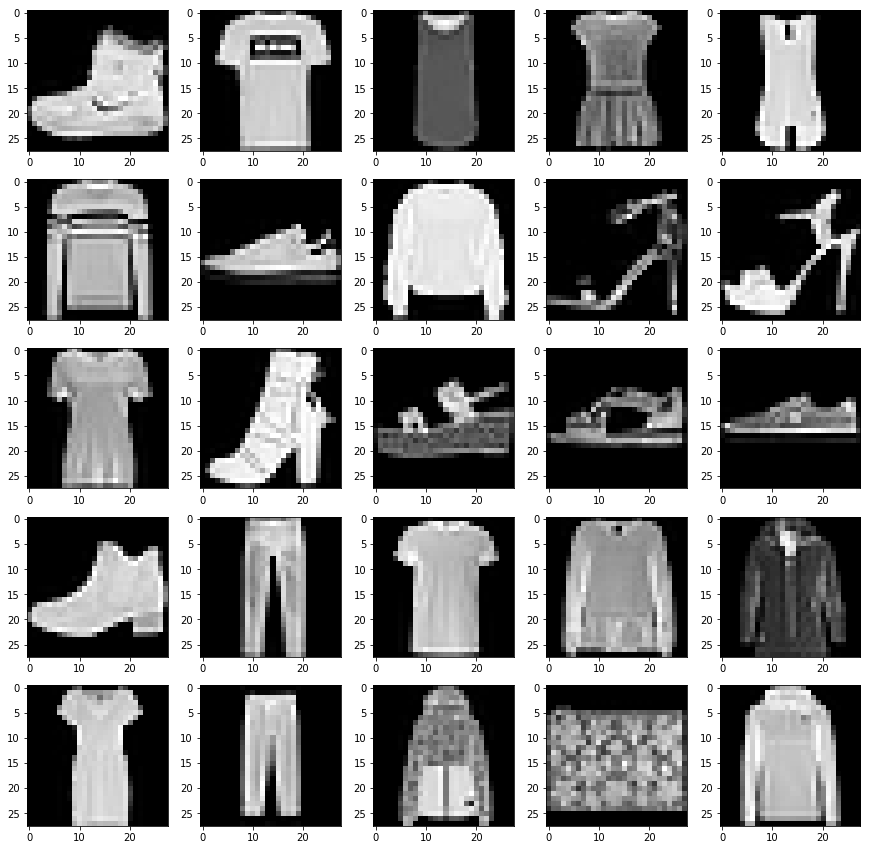

In [12]:
plt.figure(figsize=(15,15))

for i in range(25):
    ax=plt.subplot(5,5,i+1)
    image=x_train[i]
    plt.imshow(image,cmap='gray')

In [10]:
y_train[:25]  # We have ten different classes here

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

### Convert Labels into OneHot Encoding

In [13]:
from keras.utils.np_utils import to_categorical

y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
x_train.max()

255

In [16]:
x_train.min()

0

### Normalized The Data

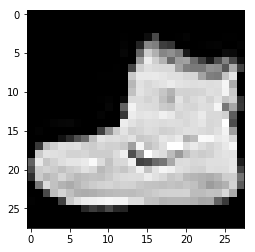

In [18]:
x_train=x_train/255
x_test=x_test/255

plt.imshow(x_train[0],cmap='gray')

### Reshape the data

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
# We have to add a color channel dimension to the data
x_train=x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [22]:
x_test=x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

### Build the model for our Data

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [29]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
__________

### Training the model

In [30]:
model.fit(x_train,y_cat_train,epochs=4,verbose=1)

Epoch 1/4
60000/60000 [==============================] - 122s 2ms/step - loss: 0.4891 - acc: 0.8223
Epoch 2/4
60000/60000 [==============================] - 103s 2ms/step - loss: 0.3349 - acc: 0.8772
Epoch 3/4
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2919 - acc: 0.8922
Epoch 4/4
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2627 - acc: 0.9016


In [31]:
model.evaluate(x_test,y_cat_test)


10000/10000 [==============================] - 5s 537us/step


[0.2718683957695961, 0.9022]

In [33]:
model.metrics_names

['loss', 'acc']

In [34]:
predictions=model.predict_classes(x_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.83      0.85      1000
          1       1.00      0.97      0.98      1000
          2       0.82      0.89      0.85      1000
          3       0.86      0.94      0.90      1000
          4       0.85      0.83      0.84      1000
          5       0.98      0.97      0.98      1000
          6       0.76      0.68      0.72      1000
          7       0.95      0.97      0.96      1000
          8       0.96      0.99      0.97      1000
          9       0.97      0.96      0.96      1000

avg / total       0.90      0.90      0.90     10000

